# **New York Taxi Fare Prediction**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from geopy.distance import great_circle
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Big Data Project/NYC CSV.csv')

In [ ]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df.shape

(1048575, 8)


# **Distance Calculation**
<br>

At first we need to calculate distance for each trip. we must make sure the coordinates are in correct range

In [ ]:
# coordinates validation
def are_coordinates_valid(lat, long):
    return -90 <= lat <= 90 and -180 <= long <= 180

Distance Calculation Function

In [ ]:
def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])

    if all(are_coordinates_valid(*coords) for coords in [pickup, dropoff]):
        return great_circle(pickup, dropoff).km
    else:
        return np.nan

In [ ]:
df['trip_distance'] = df.apply(calculate_distance, axis=1)

In [ ]:
df['trip_distance']

0          1.030765
1          8.450146
2          1.389527
3          2.799274
4          1.999160
             ...   
1048570    1.819834
1048571    2.195200
1048572    2.015502
1048573    1.461360
1048574    2.863916
Name: trip_distance, Length: 1048575, dtype: float64

Now we need to extract hour and day fo the week.

In [ ]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030765
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450146
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389527
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799274
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999160


In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

In [ ]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek

In [ ]:
df = df.drop(['pickup_datetime', 'key'], axis=1)

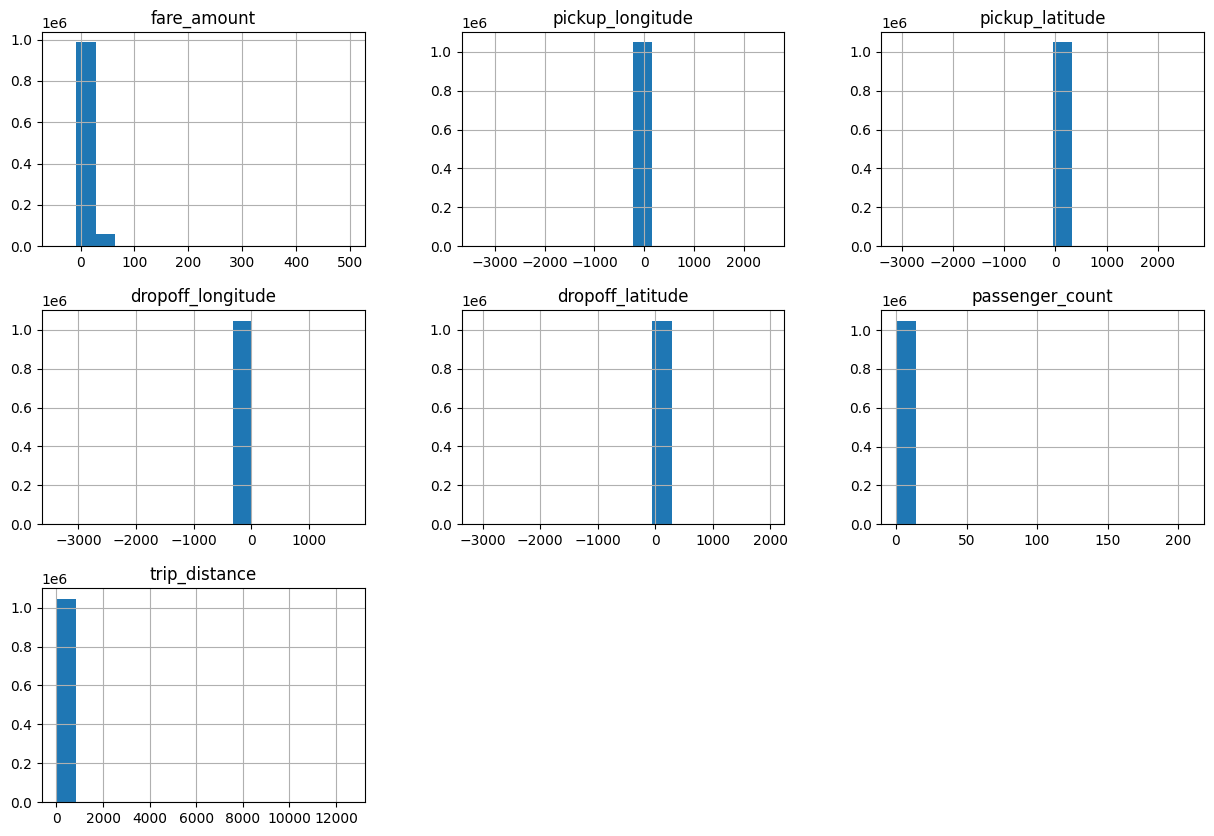

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# 1. Feature Distributions
df.hist(bins=15, figsize=(15, 10))
plt.show()

Data Splitting

In [ ]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# **Model Evaluation**

**Linear Reegresion**

In [ ]:
#  Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train)

LinearRegression()

In [ ]:
# Evaluate the model
y_pred = lr_model.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
r2_score = lr_model.score(X_test_imputed, y_test)

In [ ]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2_score)

Mean Squared Error: 95.22047062949316
R^2 Score: 0.0007594891867627185


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Evaluate the model
y_pred_rf = rf_model.predict(X_test_imputed)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_score_rf = rf_model.score(X_test_imputed, y_test)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R^2 Score:", r2_score_rf)

Random Forest - Mean Squared Error: 20.01043573559054
Random Forest - R^2 Score: 0.7900111405263973


**Gradient Boosting**

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_imputed, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Evaluate the model
y_pred_gb = gb_model.predict(X_test_imputed)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_score_gb = gb_model.score(X_test_imputed, y_test)

print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - R² Score:", r2_score_gb)

Gradient Boosting - Mean Squared Error: 21.94103894334478
Gradient Boosting - R² Score: 0.7697514534786367


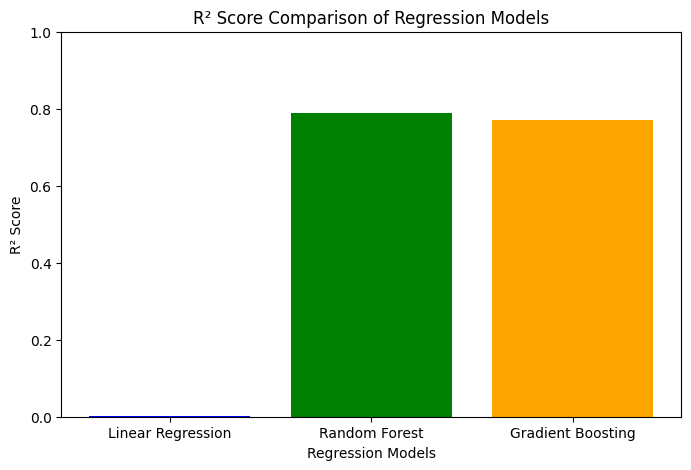

In [ ]:
import matplotlib.pyplot as plt

# R² scores for different models
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
r2_scores = [r2_score, r2_score_rf, r2_score_gb]


plt.figure(figsize=(8, 5))
plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.title('R² Score Comparison of Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('R² Score')
plt.ylim(0, 1)  # Set y-axis limit to the range [0, 1]
plt.show()
